# Dodanie ścieżki do projektu

In [8]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Importowanie bibliotek

In [9]:
from src.scrapers import healthdata, koronawirusunas, meteostat, policjapl, rmf24
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from src.utils import save, paths
from pathlib import Path

# Pobranie i zapisanie danych

In [10]:
update = False

if len(os.listdir(paths.get_path())) == 0 or update:
    data = {**healthdata.get_data(),
            **koronawirusunas.get_data(),
            **{"meteostat": pd.DataFrame(meteostat.get_data(end_date=str(datetime.datetime.now().date()) ))},
            **policjapl.scrape() }
    save.save_dataframes(data=data)
else:
    print("Data directory is not empty. propably data inside.")

Data directory is not empty. propably data inside.


# Załadowanie danych

In [89]:
policja = pd.read_csv(Path(paths.get_path(), "policjapl.csv"), index_col=1, parse_dates=True, dayfirst=True)
health = pd.read_csv(Path(paths.get_path(), "healthdata.csv"), index_col=2, parse_dates=True, dayfirst=True)
korona = pd.read_csv(Path(paths.get_path(), "koronawirusunas.csv"), index_col=0, parse_dates=True, dayfirst=True)
meteo = pd.read_csv(Path(paths.get_path(), "meteostat.csv"), index_col=1, parse_dates=True, dayfirst=True)

# Czyszczenie danych

In [61]:
del meteo["Unnamed: 0"]
del policja["Unnamed: 0"]
policja.index.name = None
korona.index.name = None

AttributeError: 'DataFrame' object has no attribute 'location_name'

## Czyszczenie meteo

In [90]:
meteo.head()

,Unnamed: 0,temperature,temperature_min,temperature_max,precipitation,snowfall,snowdepth,winddirection,windspeed,peakgust,sunshine,pressure
date,,,,,,,,,,,,
2020-02-01,0,9.4,5.9,11.6,2.8,NaN,NaN,221.0,9.6,NaN,NaN,1003.3
2020-02-02,1,7.1,4.7,10.9,3.8,NaN,NaN,256.0,20.0,NaN,NaN,1001.8
2020-02-03,2,3.9,2.1,6.0,0.5,NaN,NaN,251.0,13.4,NaN,NaN,1004.9
2020-02-04,3,4.9,1.6,6.1,1.5,NaN,NaN,293.0,12.3,NaN,NaN,999.6
2020-02-05,4,0.6,-1.2,3.4,2.3,NaN,NaN,247.0,19.5,NaN,NaN,1019.9


In [91]:
meteo.drop(["snowfall", "snowdepth", "peakgust", "sunshine","precipitation","Unnamed: 0"], axis=1, inplace=True)
meteo.index.name = None
meteo.head()

,Unnamed: 0,temperature,temperature_min,temperature_max,winddirection,windspeed,pressure
2020-02-01,0,9.4,5.9,11.6,221.0,9.6,1003.3
2020-02-02,1,7.1,4.7,10.9,256.0,20.0,1001.8
2020-02-03,2,3.9,2.1,6.0,251.0,13.4,1004.9
2020-02-04,3,4.9,1.6,6.1,293.0,12.3,999.6
2020-02-05,4,0.6,-1.2,3.4,247.0,19.5,1019.9


In [92]:
meteo[meteo.isnull().any(axis=1)]

,Unnamed: 0,temperature,temperature_min,temperature_max,winddirection,windspeed,pressure
2020-05-03,92,10.4,6.0,14.2,NaN,11.4,1011.8


In [93]:
meteo['winddirection'].fillna(meteo['winddirection'].mean(), inplace = True)

In [94]:
meteo[meteo.isnull().any(axis=1)]

,Unnamed: 0,temperature,temperature_min,temperature_max,winddirection,windspeed,pressure


## Czyszczenie health

In [70]:
health.columns

Index(['V1', 'location_name', 'allbed_mean', 'allbed_lower', 'allbed_upper',
       'ICUbed_mean', 'ICUbed_lower', 'ICUbed_upper', 'InvVen_mean',
       'InvVen_lower', 'InvVen_upper', 'deaths_mean', 'deaths_lower',
       'deaths_upper', 'admis_mean', 'admis_lower', 'admis_upper',
       'newICU_mean', 'newICU_lower', 'newICU_upper', 'totdea_mean',
       'totdea_lower', 'totdea_upper', 'bedover_mean', 'bedover_lower',
       'bedover_upper', 'icuover_mean', 'icuover_lower', 'icuover_upper',
       'deaths_mean_smoothed', 'deaths_lower_smoothed',
       'deaths_upper_smoothed', 'totdea_mean_smoothed',
       'totdea_lower_smoothed', 'totdea_upper_smoothed', 'mobility_data_type',
       'mobility_composite', 'total_tests_data_type', 'total_tests',
       'confirmed_infections', 'est_infections_mean', 'est_infections_lower',
       'est_infections_upper'],
      dtype='object')

In [95]:
health = health.drop(health[health.index > "2020-05-20"].index)
health = health[health.location_name == "Poland"]
health = health[["allbed_mean", "ICUbed_mean", "deaths_mean", "admis_mean", "newICU_mean", 
                 "totdea_mean", "bedover_mean", "icuover_mean", 
                 "mobility_composite", "total_tests", "confirmed_infections"]]
health.index.name = None

In [105]:
health.tail()

,allbed_mean,ICUbed_mean,deaths_mean,admis_mean,newICU_mean,totdea_mean,bedover_mean,icuover_mean,mobility_composite,total_tests,confirmed_infections
date,,,,,,,,,,,
2020-05-16,531.896330,162.255641,16.660,67.499215,20.402642,912.462,0.0,0.0,-45.705095,14914.884465,0.0
2020-05-17,527.067489,160.814884,16.280,67.230701,20.406182,928.742,0.0,0.0,-45.706528,15113.480201,0.0
2020-05-18,523.575463,159.716028,15.989,66.909504,20.335671,944.731,0.0,0.0,-45.707487,15312.075937,0.0
2020-05-19,519.898537,158.514489,15.859,65.460435,19.919147,960.590,0.0,0.0,-45.708130,15510.671673,0.0
2020-05-20,514.962577,156.822654,15.876,63.071912,19.363049,976.466,0.0,0.0,-45.708560,15709.267409,0.0


In [97]:
health[health.isnull().any(axis=1)]

,allbed_mean,ICUbed_mean,deaths_mean,admis_mean,newICU_mean,totdea_mean,bedover_mean,icuover_mean,mobility_composite,total_tests,confirmed_infections
date,,,,,,,,,,,
2019-12-18,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.0,0.0,NaN,NaN,NaN
2019-12-19,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.0,0.0,NaN,NaN,NaN
2019-12-20,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.0,0.0,NaN,NaN,NaN
2019-12-21,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.0,0.0,NaN,NaN,NaN
2019-12-22,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-05-16,531.896330,162.255641,16.660,67.499215,20.402642,912.462,0.0,0.0,-45.705095,14914.884465,NaN
2020-05-17,527.067489,160.814884,16.280,67.230701,20.406182,928.742,0.0,0.0,-45.706528,15113.480201,NaN
2020-05-18,523.575463,159.716028,15.989,66.909504,20.335671,944.731,0.0,0.0,-45.707487,15312.075937,NaN


In [101]:
health['mobility_composite'].fillna(0, inplace = True)
health['total_tests'].fillna(0, inplace = True)
health['confirmed_infections'].fillna(0, inplace = True)

In [102]:
health[health.isnull().any(axis=1)]

,allbed_mean,ICUbed_mean,deaths_mean,admis_mean,newICU_mean,totdea_mean,bedover_mean,icuover_mean,mobility_composite,total_tests,confirmed_infections
date,,,,,,,,,,,


## Czyszczenie policja

policja.head()

In [83]:
policja.drop(["Unnamed: 0"], axis=1, inplace=True)
policja.head()

,Interwencje,Zatrzymani na gorącym uczynku,Zatrzymani poszukiwani,Zatrzymani nietrzeźwi kierujący,Wypadki drogowe,Zabici w wypadkach,Ranni w wypadkach
Data,,,,,,,
2020-05-17,14699,753,151,275,48,5,55
2020-05-16,17644,655,168,245,62,2,69
2020-05-15,17037,554,262,160,56,6,56
2020-05-14,15485,608,304,174,38,1,45
2020-05-13,15075,546,272,149,36,2,39


## Czyszczenie korona

In [103]:
korona.head()

,smp,testy,testyl,zar,chor,zgo,wyl,pieszo,pojazdem,hosp,kwar,kwar_z,nadzor
2020-02-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.53,4.70,NaN,NaN,NaN,NaN
2020-02-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.05,6.90,NaN,NaN,NaN,NaN
2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.24,4.46,NaN,NaN,NaN,NaN
2020-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.95,7.81,NaN,NaN,NaN,NaN
2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.57,22.21,NaN,NaN,NaN,NaN


In [104]:
korona.tail()

,smp,testy,testyl,zar,chor,zgo,wyl,pieszo,pojazdem,hosp,kwar,kwar_z,nadzor
2020-05-14,17615.0,554357.0,506733.0,17615.0,10036.0,883.0,6696.0,-48.67,-22.08,2538.0,96708.0,NaN,18256.0
2020-05-15,18016.0,576276.0,526895.0,18016.0,10191.0,907.0,6918.0,-39.24,-12.05,2579.0,95068.0,NaN,18363.0
2020-05-16,18257.0,601394.0,549792.0,18257.0,10167.0,915.0,7175.0,NaN,NaN,2407.0,90386.0,NaN,18355.0
2020-05-17,18529.0,620249.0,576055.0,18529.0,10153.0,925.0,7451.0,NaN,NaN,2459.0,84542.0,NaN,18195.0
2020-05-18,NaN,NaN,NaN,18529.0,9976.0,925.0,7628.0,NaN,NaN,2544.0,80947.0,NaN,18772.0


### Wypełnienie nan

In [114]:
korona['kwar_z'].fillna(0, inplace=True)
korona.fillna(method='ffill', inplace=True)
korona.fillna(0, inplace=True)

In [115]:
korona

,smp,testy,testyl,zar,chor,zgo,wyl,pieszo,pojazdem,hosp,kwar,kwar_z,nadzor
2020-02-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.53,4.70,0.0,0.0,0.0,0.0
2020-02-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.05,6.90,0.0,0.0,0.0,0.0
2020-02-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.24,4.46,0.0,0.0,0.0,0.0
2020-02-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.95,7.81,0.0,0.0,0.0,0.0
2020-02-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.57,22.21,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-14,17615.0,554357.0,506733.0,17615.0,10036.0,883.0,6696.0,-48.67,-22.08,2538.0,96708.0,0.0,18256.0
2020-05-15,18016.0,576276.0,526895.0,18016.0,10191.0,907.0,6918.0,-39.24,-12.05,2579.0,95068.0,0.0,18363.0
2020-05-16,18257.0,601394.0,549792.0,18257.0,10167.0,915.0,7175.0,-39.24,-12.05,2407.0,90386.0,0.0,18355.0
2020-05-17,18529.0,620249.0,576055.0,18529.0,10153.0,925.0,7451.0,-39.24,-12.05,2459.0,84542.0,0.0,18195.0


# Łączenie danych

In [50]:
df = pd.merge(policja, meteo, how='outer', left_index=True, right_index=True)
#df = pd.merge(df, health, how='outer', left_index=True, right_index=True)
df = pd.merge(df, korona, how='outer', left_index=True, right_index=True)

In [51]:
df.head(10)

,Interwencje,Zatrzymani na gorącym uczynku,Zatrzymani poszukiwani,Zatrzymani nietrzeźwi kierujący,Wypadki drogowe,Zabici w wypadkach,Ranni w wypadkach,temperature,temperature_min,temperature_max,...,zar,chor,zgo,wyl,pieszo,pojazdem,hosp,kwar,kwar_z,nadzor
2019-12-20,18837.0,550.0,280.0,169.0,105.0,7.0,115.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-21,19185.0,555.0,195.0,220.0,100.0,11.0,118.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-22,15600.0,534.0,201.0,207.0,74.0,2.0,86.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-23,17373.0,450.0,355.0,166.0,128.0,10.0,152.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-24,12015.0,361.0,210.0,170.0,95.0,8.0,118.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-25,11910.0,371.0,134.0,175.0,36.0,3.0,43.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-26,11343.0,337.0,126.0,161.0,56.0,9.0,72.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-27,15297.0,438.0,298.0,150.0,66.0,9.0,83.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-28,13601.0,425.0,183.0,141.0,32.0,5.0,31.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-29,12406.0,453.0,188.0,161.0,37.0,3.0,47.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Współcznniki korelacji

In [30]:
def highlight(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    l = []
    for v in s:
        if abs(v) > 0.85 and abs(v) != 1:
            l.append('background-color: red')
        elif abs(v) > 0.75 and abs(v) != 1:
            l.append('background-color: yellow')
        else: 
            l.append('')
    return l

## Pearson

In [39]:
cor_pearson = df.corr(method="pearson")
cor_pearson.style.apply(highlight)

,Interwencje,Zatrzymani na gorącym uczynku,Zatrzymani poszukiwani,Zatrzymani nietrzeźwi kierujący,Wypadki drogowe,Zabici w wypadkach,Ranni w wypadkach,temperature,temperature_min,temperature_max,precipitation,snowfall,snowdepth,winddirection,windspeed,peakgust,sunshine,pressure,smp,testy,testyl,zar,chor,zgo,wyl,pieszo,pojazdem,hosp,kwar,kwar_z,nadzor
Interwencje,1.000000,0.218204,0.081724,0.238929,0.262340,0.122284,0.228177,0.490110,0.384253,0.457240,0.235839,nan,nan,-0.088759,-0.279728,nan,nan,-0.006365,0.309762,0.275344,0.144641,0.309762,-0.301574,0.290288,-0.121495,0.053625,0.080673,0.317800,0.292800,-0.044853,-0.251283
Zatrzymani na gorącym uczynku,0.218204,1.000000,0.547149,0.623770,0.558776,0.177899,0.555380,0.042177,0.354528,-0.077870,-0.010944,nan,nan,0.135646,-0.090068,nan,nan,-0.536533,0.525568,0.580989,0.699371,0.525568,0.757864,0.842866,0.858087,0.760644,0.831886,0.023182,-0.294569,-0.643515,-0.816438
Zatrzymani poszukiwani,0.081724,0.547149,1.000000,-0.192743,0.643283,0.039188,0.623077,-0.233921,0.065125,-0.319069,-0.272627,nan,nan,0.146794,0.057671,nan,nan,-0.499165,0.074312,0.113748,0.180141,0.074312,0.459148,0.495647,0.483978,0.797539,0.845024,-0.283967,-0.441748,-0.821766,-0.660313
Zatrzymani nietrzeźwi kierujący,0.238929,0.623770,-0.192743,1.000000,0.163585,0.211720,0.182184,0.271501,0.387221,0.202993,0.287986,nan,nan,0.037301,-0.181043,nan,nan,-0.256181,0.485064,0.505084,0.257353,0.485064,0.363996,0.589477,0.419204,0.249379,0.286972,0.199110,-0.028213,-0.066716,-0.503540
Wypadki drogowe,0.262340,0.558776,0.643283,0.163585,1.000000,0.389475,0.977048,-0.014038,0.272891,-0.113152,-0.284111,nan,nan,0.100292,-0.123980,nan,nan,-0.551088,0.205485,0.255240,0.037485,0.205485,0.565828,0.580089,0.553949,0.786857,0.839536,-0.193551,-0.498152,-0.391116,-0.700497
Zabici w wypadkach,0.122284,0.177899,0.039188,0.211720,0.389475,1.000000,0.346482,0.015250,0.126363,-0.042351,-0.037690,nan,nan,0.034216,0.051009,nan,nan,-0.198118,-0.030532,-0.032389,-0.349423,-0.030532,0.151415,0.088612,0.009764,0.246146,0.232004,-0.178134,-0.260572,0.060550,-0.251284
Ranni w wypadkach,0.228177,0.555380,0.623077,0.182184,0.977048,0.346482,1.000000,-0.055384,0.238604,-0.131767,-0.313613,nan,nan,0.093187,-0.122941,nan,nan,-0.544777,0.221688,0.269794,-0.068316,0.221688,0.577075,0.599665,0.560658,0.796375,0.837564,-0.184968,-0.504761,-0.452046,-0.719650
temperature,0.490110,0.042177,-0.233921,0.271501,-0.014038,0.015250,-0.055384,1.000000,0.802625,0.961456,0.323377,nan,nan,-0.067863,-0.216670,nan,nan,-0.147625,0.636587,0.591941,-0.140861,0.636587,0.261941,0.593185,0.239130,-0.195794,-0.064655,0.600575,0.323516,-0.180413,-0.329176
temperature_min,0.384253,0.354528,0.065125,0.387221,0.272891,0.126363,0.238604,0.802625,1.000000,0.674579,0.240734,nan,nan,0.043802,-0.045153,nan,nan,-0.411329,0.617303,0.601919,-0.285763,0.617303,0.538756,0.692330,0.502840,0.088507,0.233566,0.433162,0.151515,-0.223157,-0.470602
temperature_max,0.457240,-0.077870,-0.319069,0.202993,-0.113152,-0.042351,-0.131767,0.961456,0.674579,1.000000,0.223391,nan,nan,-0.076179,-0.253848,nan,nan,-0.063451,0.567047,0.519819,-0.172670,0.567047,0.078497,0.496739,0.105542,-0.279772,-0.170364,0.583175,0.339724,-0.048721,-0.253956


## Kendall

In [40]:
cor_pearson = df.corr(method="kendall")
cor_pearson.style.apply(highlight)

,Interwencje,Zatrzymani na gorącym uczynku,Zatrzymani poszukiwani,Zatrzymani nietrzeźwi kierujący,Wypadki drogowe,Zabici w wypadkach,Ranni w wypadkach,temperature,temperature_min,temperature_max,precipitation,snowfall,snowdepth,winddirection,windspeed,peakgust,sunshine,pressure,smp,testy,testyl,zar,chor,zgo,wyl,pieszo,pojazdem,hosp,kwar,kwar_z,nadzor
Interwencje,1.000000,0.123751,0.042397,0.178960,0.173197,0.111606,0.158064,0.337965,0.259879,0.307775,0.095005,nan,nan,-0.082328,-0.190587,nan,nan,-0.013597,0.185652,0.185979,0.084211,0.185652,-0.173362,0.215923,-0.167019,0.092193,0.074014,0.193298,0.231068,-0.110499,-0.094797
Zatrzymani na gorącym uczynku,0.123751,1.000000,0.398097,0.431428,0.414550,0.117697,0.409715,-0.042346,0.181287,-0.117783,-0.073477,nan,nan,0.009560,-0.063436,nan,nan,-0.332773,0.318658,0.318961,0.532983,0.318658,0.674432,0.607492,0.710430,0.617586,0.639689,0.137164,-0.249861,-0.397796,-0.681372
Zatrzymani poszukiwani,0.042397,0.398097,1.000000,-0.081196,0.512319,0.043214,0.492313,-0.110589,0.072569,-0.172558,-0.026517,nan,nan,0.075417,-0.003013,nan,nan,-0.337283,0.096098,0.096081,0.174143,0.096098,0.369037,0.342428,0.341465,0.601075,0.642057,0.052700,-0.225645,-0.618794,-0.518094
Zatrzymani nietrzeźwi kierujący,0.178960,0.431428,-0.081196,1.000000,0.136614,0.178840,0.156569,0.137466,0.202169,0.102619,0.117428,nan,nan,-0.018264,-0.134103,nan,nan,-0.178129,0.272844,0.273157,0.216360,0.272844,0.270847,0.409381,0.294215,0.236964,0.227186,0.170633,-0.065800,-0.033716,-0.356509
Wypadki drogowe,0.173197,0.414550,0.512319,0.136614,1.000000,0.245241,0.869119,-0.016934,0.164005,-0.079652,-0.040958,nan,nan,0.011069,-0.077904,nan,nan,-0.384602,0.098895,0.098513,0.021164,0.098895,0.429049,0.339607,0.416241,0.676181,0.666363,0.058628,-0.339445,-0.211124,-0.553045
Zabici w wypadkach,0.111606,0.117697,0.043214,0.178840,0.245241,1.000000,0.219327,0.003199,0.061795,-0.030475,0.037267,nan,nan,0.028742,0.060600,nan,nan,-0.140850,-0.048851,-0.049223,-0.276743,-0.048851,0.046131,0.025549,0.043881,0.177841,0.159266,-0.039179,-0.173953,0.011506,-0.183356
Ranni w wypadkach,0.158064,0.409715,0.492313,0.156569,0.869119,0.219327,1.000000,-0.053250,0.142284,-0.108778,-0.100511,nan,nan,0.008159,-0.086740,nan,nan,-0.378571,0.094878,0.095224,-0.026526,0.094878,0.462064,0.339294,0.442811,0.671368,0.655679,0.053784,-0.369015,-0.233348,-0.563234
temperature,0.337965,-0.042346,-0.110589,0.137466,-0.016934,0.003199,-0.053250,1.000000,0.601085,0.836912,0.207924,nan,nan,-0.050972,-0.145939,nan,nan,-0.076535,0.429864,0.429425,-0.127667,0.429864,0.097665,0.407551,0.118897,0.009443,-0.006187,0.472426,0.198330,-0.164835,-0.129991
temperature_min,0.259879,0.181287,0.072569,0.202169,0.164005,0.061795,0.142284,0.601085,1.000000,0.487164,0.083172,nan,nan,0.031123,-0.044259,nan,nan,-0.264102,0.387052,0.386621,-0.143241,0.387052,0.346445,0.487483,0.350696,0.187420,0.201762,0.369754,0.068005,-0.054945,-0.311782
temperature_max,0.307775,-0.117783,-0.172558,0.102619,-0.079652,-0.030475,-0.108778,0.836912,0.487164,1.000000,0.159703,nan,nan,-0.057458,-0.163990,nan,nan,-0.022315,0.377803,0.377374,-0.189474,0.377803,0.020138,0.324767,0.022258,-0.058249,-0.065409,0.433800,0.207243,-0.011112,-0.065367


## Pearson

In [35]:
cor_pearson = df.corr(method="spearman")
cor_pearson.style.apply(highlight)

,Interwencje,Zatrzymani na gorącym uczynku,Zatrzymani poszukiwani,Zatrzymani nietrzeźwi kierujący,Wypadki drogowe,Zabici w wypadkach,Ranni w wypadkach,temperature,temperature_min,temperature_max,precipitation,snowfall,snowdepth,winddirection,windspeed,peakgust,sunshine,pressure,smp,testy,testyl,zar,chor,zgo,wyl,pieszo,pojazdem,hosp,kwar,kwar_z,nadzor
Interwencje,1.000000,0.183706,0.110949,0.244235,0.250018,0.154609,0.220614,0.494271,0.379449,0.454773,0.130552,nan,nan,-0.101538,-0.287921,nan,nan,-0.019209,0.320275,0.320315,0.129323,0.320275,-0.283016,0.356934,-0.272727,0.141542,0.115544,0.333153,0.315145,-0.226623,-0.195588
Zatrzymani na gorącym uczynku,0.183706,1.000000,0.566795,0.596424,0.594662,0.161258,0.587858,-0.046802,0.263824,-0.161933,-0.105463,nan,nan,0.027391,-0.104736,nan,nan,-0.486613,0.342075,0.342137,0.654381,0.342075,0.851464,0.764792,0.870987,0.827248,0.840065,0.182149,-0.318758,-0.618262,-0.869679
Zatrzymani poszukiwani,0.110949,0.566795,1.000000,-0.099913,0.715100,0.066609,0.693787,-0.161223,0.120791,-0.259027,-0.037893,nan,nan,0.107988,0.002307,nan,nan,-0.484103,0.081317,0.081317,0.239940,0.081317,0.496934,0.446570,0.462466,0.801767,0.835753,0.055185,-0.304348,-0.781079,-0.689683
Zatrzymani nietrzeźwi kierujący,0.244235,0.596424,-0.099913,1.000000,0.204483,0.251413,0.231484,0.193101,0.303990,0.140573,0.167327,nan,nan,-0.029369,-0.205479,nan,nan,-0.264403,0.384026,0.384122,0.304626,0.384026,0.375961,0.572059,0.407332,0.332899,0.313421,0.269224,-0.076682,-0.068509,-0.501196
Wypadki drogowe,0.250018,0.594662,0.715100,0.204483,1.000000,0.341495,0.969391,-0.038134,0.247966,-0.135765,-0.057956,nan,nan,0.026201,-0.122591,nan,nan,-0.545669,0.107322,0.107207,0.015049,0.107322,0.579822,0.485691,0.572134,0.867871,0.860784,0.057577,-0.463918,-0.308371,-0.755966
Zabici w wypadkach,0.154609,0.161258,0.066609,0.251413,0.341495,1.000000,0.305602,0.003536,0.087187,-0.043789,0.057873,nan,nan,0.039672,0.091402,nan,nan,-0.214860,-0.068842,-0.069264,-0.400683,-0.068842,0.063063,0.035679,0.057433,0.250063,0.229792,-0.046444,-0.251530,0.057781,-0.273005
Ranni w wypadkach,0.220614,0.587858,0.693787,0.231484,0.969391,0.305602,1.000000,-0.085058,0.210248,-0.165944,-0.146348,nan,nan,0.018330,-0.123603,nan,nan,-0.538272,0.101192,0.101234,-0.036131,0.101192,0.643760,0.482880,0.628026,0.865913,0.858157,0.053061,-0.503571,-0.374450,-0.760298
temperature,0.494271,-0.046802,-0.161223,0.193101,-0.038134,0.003536,-0.085058,1.000000,0.797080,0.961781,0.267567,nan,nan,-0.070934,-0.216799,nan,nan,-0.115726,0.640750,0.640646,-0.231262,0.640750,0.154600,0.600060,0.173775,0.036190,0.032222,0.680812,0.306510,-0.243956,-0.215241
temperature_min,0.379449,0.263824,0.120791,0.303990,0.247966,0.087187,0.210248,0.797080,1.000000,0.681699,0.118478,nan,nan,0.037458,-0.066245,nan,nan,-0.375735,0.561630,0.561028,-0.272591,0.561630,0.519952,0.688036,0.526861,0.303022,0.312238,0.543237,0.102856,-0.112088,-0.467087
temperature_max,0.454773,-0.161933,-0.259027,0.140573,-0.135765,-0.043789,-0.165944,0.961781,0.681699,1.000000,0.189951,nan,nan,-0.077693,-0.240737,nan,nan,-0.041575,0.567020,0.566959,-0.272180,0.567020,0.026573,0.479095,0.033198,-0.063529,-0.072902,0.625707,0.319119,-0.033040,-0.115443


In [41]:
df.describe()

,Interwencje,Zatrzymani na gorącym uczynku,Zatrzymani poszukiwani,Zatrzymani nietrzeźwi kierujący,Wypadki drogowe,Zabici w wypadkach,Ranni w wypadkach,temperature,temperature_min,temperature_max,...,zar,chor,zgo,wyl,pieszo,pojazdem,hosp,kwar,kwar_z,nadzor
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,107.000000,107.000000,107.000000,...,76.000000,45.000000,68.000000,45.000000,79.000000,79.000000,75.000000,75.000000,14.000000,75.000000
mean,14819.693333,496.153333,246.066667,159.980000,53.093333,5.140000,60.260000,7.054206,1.830841,11.883178,...,7082.973684,7977.200000,350.808824,2904.644444,-47.433418,-38.515570,1993.093333,87283.333333,105344.214286,27722.053333
std,1953.381168,111.759914,97.034462,45.076738,19.537727,2.870891,23.132658,4.184434,3.396958,5.290905,...,6291.035955,1926.564189,324.593029,2437.869004,35.270502,26.906165,949.470794,51900.814355,52812.405516,15307.603678
min,9992.000000,254.000000,86.000000,79.000000,14.000000,0.000000,15.000000,-0.300000,-7.400000,2.200000,...,1.000000,3432.000000,1.000000,116.000000,-84.100000,-80.220000,65.000000,349.000000,22972.000000,4540.000000
25%,13696.500000,401.250000,164.500000,129.250000,37.000000,3.000000,42.250000,3.900000,-0.450000,7.650000,...,720.250000,6628.000000,21.000000,668.000000,-73.140000,-60.310000,1111.000000,55057.500000,65116.250000,17777.500000
50%,14685.500000,518.500000,220.000000,151.500000,54.000000,5.000000,61.500000,6.600000,2.000000,11.600000,...,6155.500000,8817.000000,274.500000,2265.000000,-61.000000,-46.920000,2459.000000,96211.000000,99987.000000,20546.000000
75%,15822.000000,580.750000,341.000000,178.750000,66.000000,7.000000,74.750000,10.150000,4.150000,16.050000,...,12699.250000,9429.000000,653.500000,4862.000000,-33.610000,-15.970000,2665.500000,114720.000000,159012.750000,36843.000000
max,19989.000000,753.000000,415.000000,332.000000,128.000000,15.000000,152.000000,17.500000,9.800000,25.400000,...,18529.000000,10191.000000,925.000000,7628.000000,43.570000,22.210000,3505.000000,183095.000000,169092.000000,59081.000000


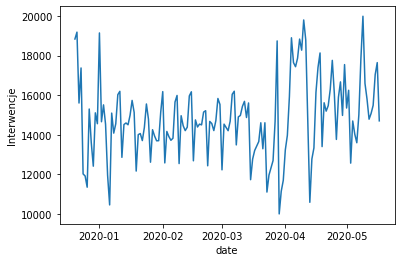

In [46]:
sns.lineplot(data=df, x = "date", y = "Interwencje")